In [15]:
f = open('./data.txt')

arr_heart = []
t = []

count = 0
for i in f:
    g = float(i.replace(',', ''))
#     if g>500000:
    count = count+1
    arr_heart.append(g)
    t.append(count)


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline



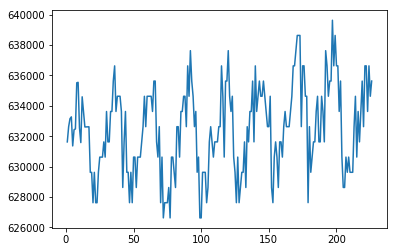

In [17]:
plt.plot(t, arr_heart)
plt.rcParams["figure.figsize"] = (20,40)


## testing np.diff


In [38]:
import numpy as np
arr = [1,4,9,16,25,36,49,64,81]
diff_arr = np.diff(arr, 2)
print(diff_arr)

[2 2 2 2 2 2 2]


## applying to data

In [39]:
first_diff_of_photo = np.diff(arr_heart,1)
second_diff_of_photo = np.diff(arr_heart, 2)

heart beat coun=
79

Concavity changes occured in the red spots:


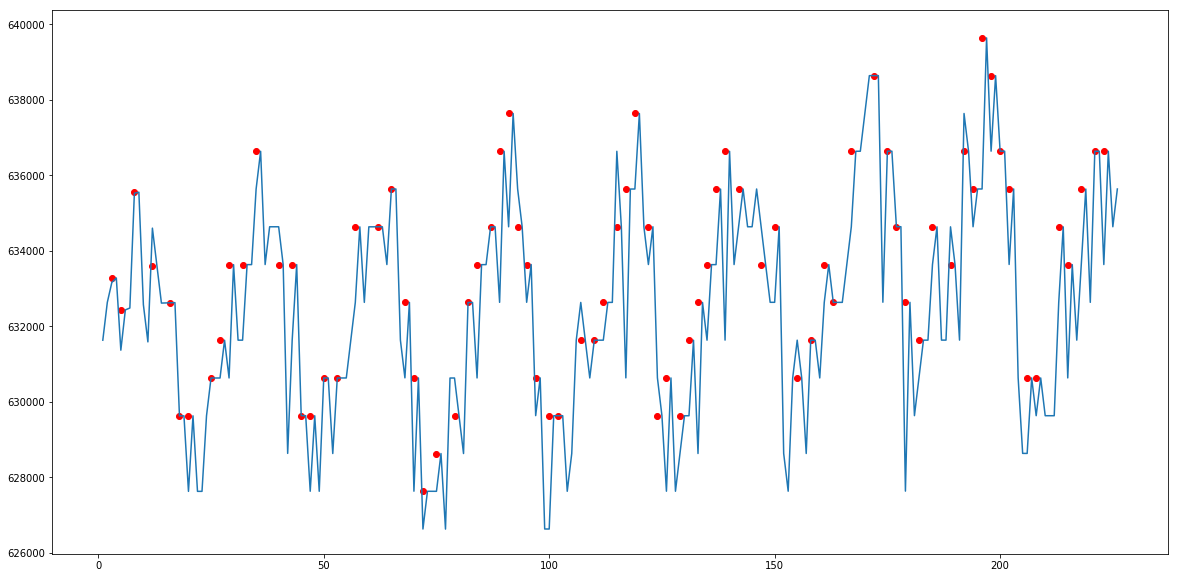

In [46]:
heart_beat_count = 0
heart_beat_indeces = []
for i in range(1, len(second_diff_of_photo)):
    before = second_diff_of_photo[i-1]
    now = second_diff_of_photo[i]
    if before<0 and now>0:
        heart_beat_count = heart_beat_count+1
        heart_beat_indeces.append(i)
        
print("heart beat coun=")
print(heart_beat_count)
print()
print("Concavity changes occured in the red spots:")
plt.plot(t, arr_heart)
plt.scatter(heart_beat_indeces, [arr_heart[i] for i in heart_beat_indeces], c='r')
plt.rcParams["figure.figsize"] = (20,10)

    

## Problem: Concavity changes are observed in really small irreguarlities 

### Smooth out the function?

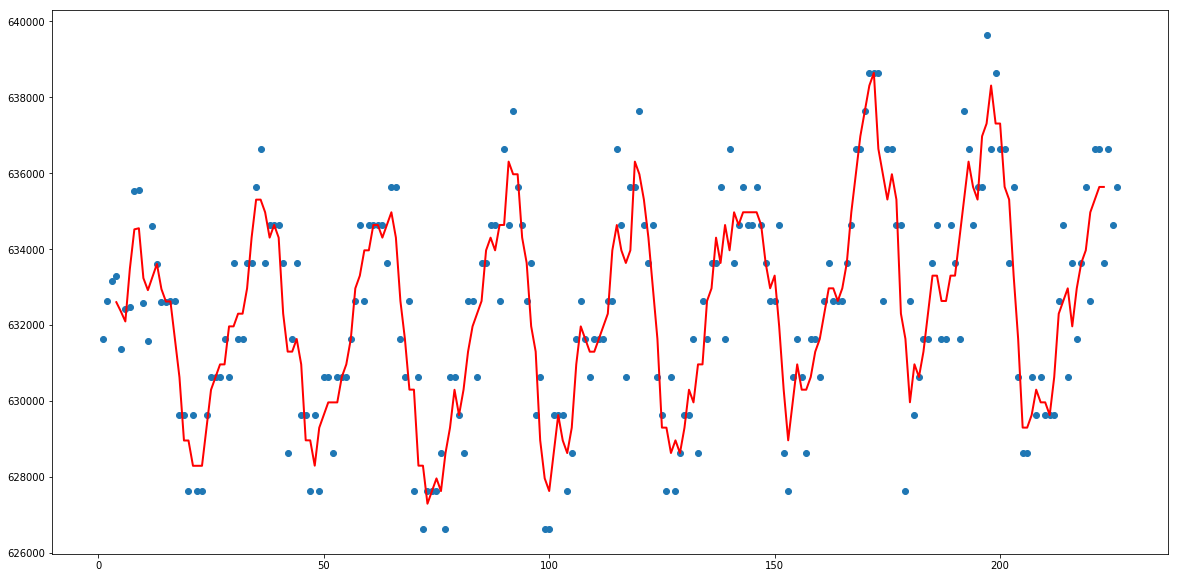

In [47]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth


plt.plot(t, arr_heart,'o')
plt.plot(t[3:-3], smooth(arr_heart,3)[3:-3], 'r-', lw=2)


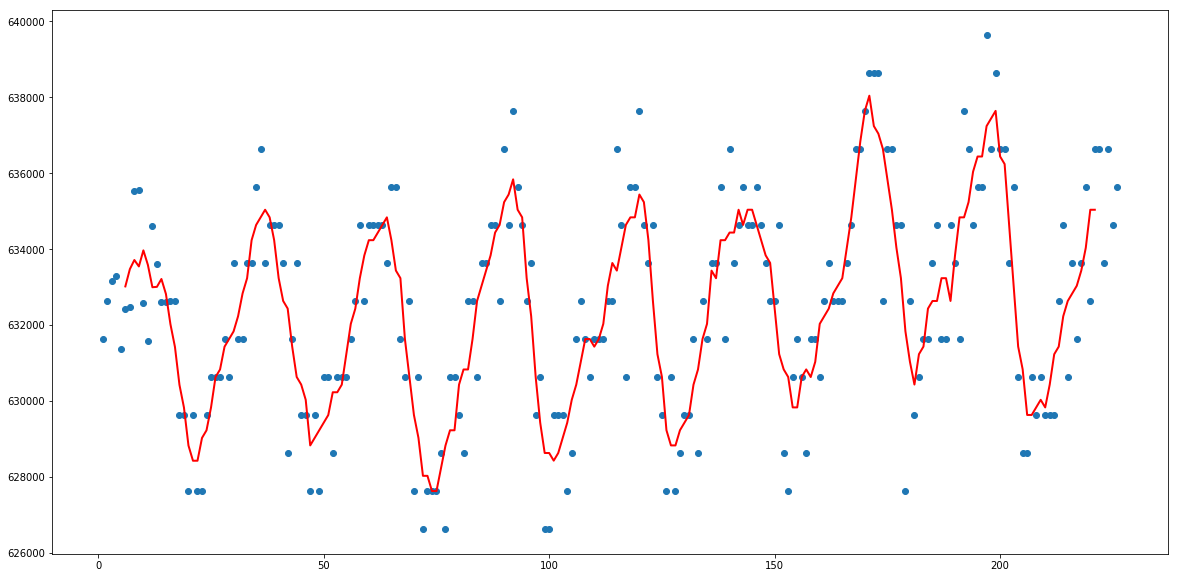

In [48]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth


plt.plot(t, arr_heart,'o')
plt.plot(t[5:-5], smooth(arr_heart,5)[5:-5], 'r-', lw=2)


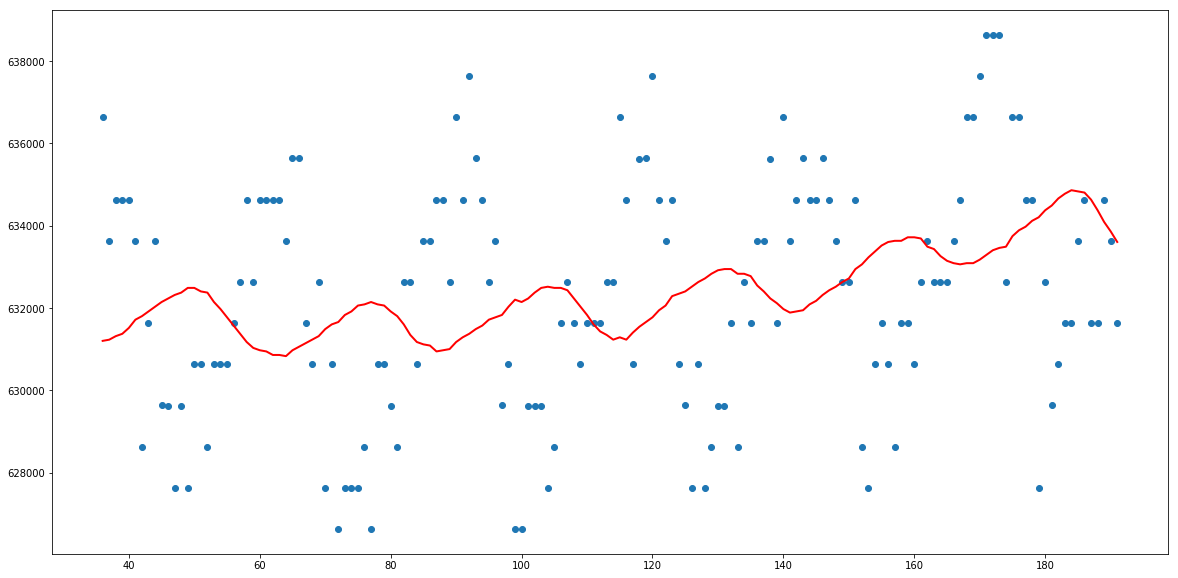

In [49]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth


new_smooth_box_pt_number = 35
plt.plot(t[new_smooth_box_pt_number:-new_smooth_box_pt_number], arr_heart[new_smooth_box_pt_number:-new_smooth_box_pt_number],'o')
plt.plot(t[new_smooth_box_pt_number:-new_smooth_box_pt_number], smooth(arr_heart,new_smooth_box_pt_number)[new_smooth_box_pt_number:-new_smooth_box_pt_number], 'r-', lw=2)


### Find frequency in smoothed function

heart beat coun=
46

Heart beat occured in the red spots:


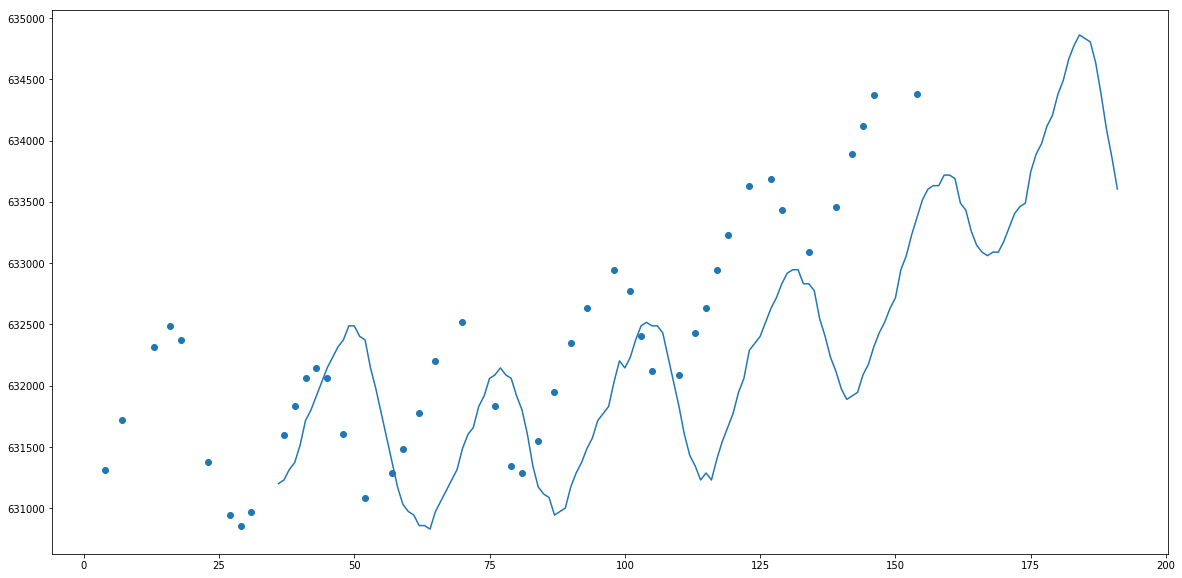

In [50]:
new_smoothed_out_heart_beat = smooth(arr_heart,new_smooth_box_pt_number)[new_smooth_box_pt_number:-new_smooth_box_pt_number]
new_t_smooth = t[new_smooth_box_pt_number:-new_smooth_box_pt_number]



first_diff_of_photo = np.diff(new_smoothed_out_heart_beat,1)
second_diff_of_photo = np.diff(new_smoothed_out_heart_beat, 2)

heart_beat_count = 0
heart_beat_indeces = []
for i in range(1, len(second_diff_of_photo)):
    before = second_diff_of_photo[i-1]
    now = second_diff_of_photo[i]
    if before<0 and now>0:
        heart_beat_count = heart_beat_count+1
        heart_beat_indeces.append(i)
        
print("heart beat coun=")
print(heart_beat_count)
print()
print("Heart beat occured in the red spots:")
plt.plot(new_t_smooth, new_smoothed_out_heart_beat)
plt.scatter([i+2 for i in heart_beat_indeces], [new_smoothed_out_heart_beat[i] for i in heart_beat_indeces])
plt.rcParams["figure.figsize"] = (20,10)


In [51]:
print("heart beat coun=")
print(heart_beat_count)
print("how long?")
print(str(len(t[4:60])/20) + ' seconds')



heart beat coun=
46
how long?
2.8 seconds


#### Inconsistent and inaccurate..

# Method 2: FFT


In [11]:
import scipy.fftpack


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


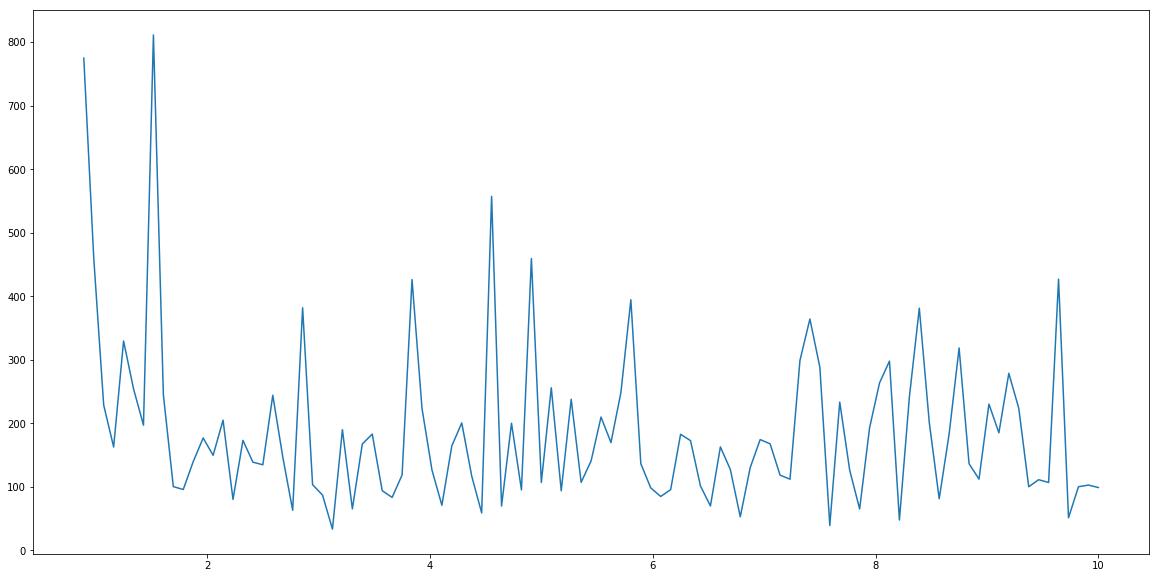

In [52]:
N = len(t)
T = 1.0/20.0
x = np.linspace(0.0, N*T, N)
y = arr_heart
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig,ax = plt.subplots()
ax.plot(xf[10:], (2.0/N * np.abs(yf[:N//2]))[10:])


plt.rcParams["figure.figsize"] = (10,10)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  del sys.path[0]


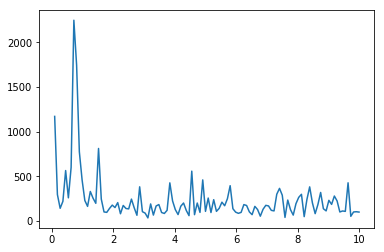

In [53]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = len(t)
# sample spacing
T = 1.0/20.0
x = np.linspace(0.0, N*T, N)
y = arr_heart
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, ax = plt.subplots()
ax.plot(xf[1:], 2.0/N * np.abs(yf[:N//2])[1:])
plt.show()



## Find the peaks

In [54]:
from scipy.signal import find_peaks_cwt
cb = np.array(2.0/N * np.abs(yf[:N//2])[2:])
indexes = find_peaks_cwt(cb, xf[2:])

In [55]:
indexes

array([ 6, 15, 41])

In [57]:
final_fft_arr = 2.0/N * np.abs(yf[:N//2])[2:]
print(final_fft_arr[5])
print(final_fft_arr[6]) # it is a peak indeed
print(final_fft_arr[7])

print()
print(final_fft_arr[14])
print(final_fft_arr[15]) # it is a peak indeed
print(final_fft_arr[16])

599.512924847
2246.69696498
1744.93736846

197.144155507
811.108344118
244.907158084


In [61]:
# Which frequency is it?
frequencies = xf[2:]
print(frequencies[15])

1.51785714286


In [62]:
# BPM = frequency * 60:
print(frequencies[15] * 60)

91.0714285714
